# Exploratory Data Analysis

## Preparing for EDA

### Loading in json files and saving them as csv.gz files

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os, time, json
from sqlalchemy import create_engine

In [2]:
#Saving all .json files from loop in part 2 as .csv.gz files

YEARS = range(2000,2023)

for YEAR in YEARS:
    
    #Defining the JSON file to store results for year
    JSON_FILE = f'Data/tmdb_api_results_{YEAR}.json'
    
    #Saving as .csv.gz
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"Data/final_tmdb_data_{YEAR}.csv.gz",
                         compression="gzip", index=False)

In [3]:
#Loading each file in
df1 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df2 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df3 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
df4 = pd.read_csv('Data/final_tmdb_data_2003.csv.gz')
df5 = pd.read_csv('Data/final_tmdb_data_2004.csv.gz')
df6 = pd.read_csv('Data/final_tmdb_data_2005.csv.gz')
df7 = pd.read_csv('Data/final_tmdb_data_2006.csv.gz')
df8 = pd.read_csv('Data/final_tmdb_data_2007.csv.gz')
df9 = pd.read_csv('Data/final_tmdb_data_2008.csv.gz')
df10 = pd.read_csv('Data/final_tmdb_data_2009.csv.gz')
df11 = pd.read_csv('Data/final_tmdb_data_2010.csv.gz')
df12 = pd.read_csv('Data/final_tmdb_data_2011.csv.gz')
df13 = pd.read_csv('Data/final_tmdb_data_2012.csv.gz')
df14 = pd.read_csv('Data/final_tmdb_data_2013.csv.gz')
df15 = pd.read_csv('Data/final_tmdb_data_2014.csv.gz')
df16 = pd.read_csv('Data/final_tmdb_data_2015.csv.gz')
df17 = pd.read_csv('Data/final_tmdb_data_2016.csv.gz')
df18 = pd.read_csv('Data/final_tmdb_data_2017.csv.gz')
df19 = pd.read_csv('Data/final_tmdb_data_2018.csv.gz')
df20 = pd.read_csv('Data/final_tmdb_data_2019.csv.gz')
df21 = pd.read_csv('Data/final_tmdb_data_2020.csv.gz')
df22 = pd.read_csv('Data/final_tmdb_data_2021.csv.gz')
df23 = pd.read_csv('Data/final_tmdb_data_2022.csv.gz')

#checking if they worked
df1.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


### Concatenating the data into 1 dataframe for the remainder of the analysis

In [4]:
#concatenating all dataframes into one

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,
              df11,df12,df13,df14,df15,df16,df17,df18,df19,
              df20,df21,df22], ignore_index=True)

In [5]:
#Checking for duplicates
df.duplicated().sum()

21

In [6]:
#Dropping duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60688 entries, 0 to 60708
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60688 non-null  object 
 1   adult                  60687 non-null  float64
 2   backdrop_path          37926 non-null  object 
 3   belongs_to_collection  3901 non-null   object 
 4   budget                 60687 non-null  float64
 5   genres                 60687 non-null  object 
 6   homepage               14801 non-null  object 
 7   id                     60687 non-null  float64
 8   original_language      60687 non-null  object 
 9   original_title         60687 non-null  object 
 10  overview               59349 non-null  object 
 11  popularity             60687 non-null  float64
 12  poster_path            55240 non-null  object 
 13  production_companies   60687 non-null  object 
 14  production_countries   60687 non-null  object 
 15  re

# Some basic EDA

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [9]:
revenue_filter = df['revenue'] > 0
budget_filter = df['budget'] > 0
print(revenue_filter.value_counts())
print(budget_filter.value_counts())

False    53073
True      7615
Name: revenue, dtype: int64
False    49486
True     11202
Name: budget, dtype: int64


It looks like there are 7,615 entries that have a revenue higher than 0 and 11,202 entries with a budget > 0.

In [10]:
#Excluding entries without a revenue of >0 from remaining visualizations
df = df.loc[revenue_filter & budget_filter, :].reset_index()
df.drop('index',axis=1,inplace=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,1956.0,PG
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
2,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.726,4106.0,G
3,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.108,5448.0,PG-13


### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [11]:
df['certification'].value_counts()

R        1729
PG-13    1454
PG        528
NR        153
G          88
NC-17      15
R           1
Name: certification, dtype: int64

In [12]:
#Fixing the second r value because it has a space in it
df.replace({'R ':'R'}, inplace=True)

R        1730
PG-13    1454
PG        528
NR        153
G          88
NC-17      15
Name: certification, dtype: int64

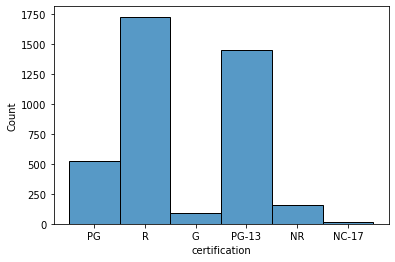

In [13]:
sns.histplot(df['certification'])
df['certification'].value_counts()

I realized that the loops in my previous notebook did not add the certification for some reason, and I need some help troubleshooting that.

This also prevents being able to answer questions 3 and 4.

### What is the average revenue per certification category?

In [18]:
#Filtering for each certification category
r = df.loc[df['certification']=='R', :]
pg13 = df.loc[df['certification']=='PG-13', :]
pg = df.loc[df['certification']=='PG', :]
nr = df.loc[df['certification']=='NR', :]
g = df.loc[df['certification']=='G', :]
nc17 = df.loc[df['certification']=='NC-17', :]

#Sanity checking
r.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
3,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R


In [42]:
# Average revenue per certification category
print(f"Avg revenue for R movies: ${r['revenue'].mean():.2f}")
print(f"Avg revenue for pg13 movies: ${pg13['revenue'].mean():.2f}")
print(f"Avg revenue for pg movies: ${pg['revenue'].mean():.2f}")
print(f"Avg revenue for nr movies: ${nr['revenue'].mean():.2f}")
print(f"Avg revenue for g movies: ${g['revenue'].mean():.2f}")
print(f"Avg revenue for nc17 movies: ${nc17['revenue'].mean():.2f}")


Avg revenue for R movies: $56770342.09
Avg revenue for pg13 movies: $158261235.11
Avg revenue for pg movies: $181843833.51
Avg revenue for nr movies: $33083422.31
Avg revenue for g movies: $167126798.98
Avg revenue for nc17 movies: $10485581.13


### What is the average budget per certification category?

In [44]:
# Average budget per certification category
print(f"Avg budget for R movies: ${r['budget'].mean():.2f}")
print(f"Avg budget for pg13 movies: ${pg13['budget'].mean():.2f}")
print(f"Avg budget for pg movies: ${pg['budget'].mean():.2f}")
print(f"Avg budget for nr movies: ${nr['budget'].mean():.2f}")
print(f"Avg budget for g movies: ${g['budget'].mean():.2f}")
print(f"Avg budget for nc17 movies: ${nc17['budget'].mean():.2f}")

Avg budget for R movies: $23834439.42
Avg budget for pg13 movies: $53239492.42
Avg budget for pg movies: $59165415.42
Avg budget for nr movies: $11638016.41
Avg budget for g movies: $52403262.84
Avg budget for nc17 movies: $5027536.73


# Deliverables

## Saving a final merged .csv.gz of all tmdb api data

In [45]:
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)